# Exploring Variables

Original Variables:
- geostrophic velocity anomalies
- wind speed
- wind stress

Options to Explore:

- geostrophic velocity error bars from CMEMS gridded level 3 product
- cyclostrophic adjustments to the velocities due to the centrifugal term
- SST gradient 
- mixed layer depth 
- bathymetry
- drogue status 

## Derived Quantities
### Cyclostrophic Adjusted Geostrophic Velocities

Cyclostrophic currents are those that arise due to the curvature of a flow and thus are ubiquitous across the ocean due to the ocean's abundance of mesoscale and submesoscale eddies. The iterative scheme is given by:

$\vec{u}^{(\mathrm{n}+1)}=\vec{u}_{g}+\frac{\vec{k}}{f} \times\left(\vec{u}^{(n)} \cdot \nabla \vec{u}^{n}\right),$

where
* $\vec{k}$ - vertical unit vector
* $f$ - Coriolis parameter
* $\vec{u}_g$ - geostrophoc velocity

This iteration scheme adjusts the velocity to include influences that are due to centrifugal force. The iteration stops when $|\vec{u}^{n+1} - \vec{u}^n|\leq 0.01$ or increases. The iteration scheme is initialised with $\vec{u}^{(0)} = \vec{u}_g$

In [12]:
import xarray as xr
import matplotlib.pyplot as plt

## Data

* **Geostrophic Velocities**: Copernicus *Global Ocean Gridded L4 Sea Surface Heights And Derived Variables Reprocessed 1993 Ongoing* dataset
* **Wind Stress and Speed**: Copernicus *Global Ocean Hourly Sea Surface Wind and Stress from Scatterometer and Model* dataset

Loading data:

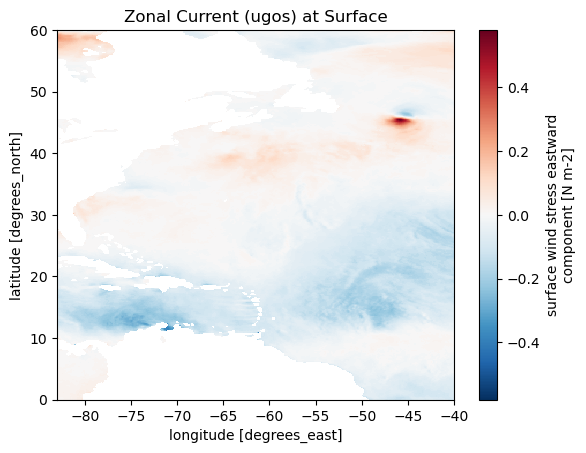

In [11]:
output_directory = "D:\PhD\ocean-datasets\copernicus-data"
output_filename="Full_CMEMS_West_NA_wind_2022_2024.nc"
# Load the NetCDF file
data_path = f"{output_directory}/{output_filename}"
dataset = xr.open_dataset(data_path)

ugos = dataset['eastward_stress']

# Plot the data for a specific time and depth
ugos.isel(time=500).plot()
plt.title('Zonal Current (ugos) at Surface')
plt.show()